In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
os.chdir('/Users/Bya/git/predictEPL/')
from MyFunctions import dataIO

In [52]:
#!/usr/bin/env python2
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.misc import imread

In [65]:
def CSVreturnDF(filepathName, listHeaderNames):
    # read file as dataframe, and add 'side' column that shows which team's tweet it is 
    dfTweets = pd.read_csv(filepathName, header=None, names=listHeaderNames)
    return dfTweets

In [84]:
def Wordle(text):
    twitter_mask = imread('/Users/Bya/git/predictEPL/Wordle/twitter_mask.png', flatten=True)
#     more_stopwords = {'oh', 'will', 'hey', 'yet', ...}
    more_stopwords = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']
    STOPWORDSS = STOPWORDS.union(more_stopwords)
    wordcloud = WordCloud(background_color="black", \
                          width=900, \
                          height=500, \
#                           font_path='/Library/Fonts/CabinSketch-Bold.ttf',\
#                           font_path='/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc',\
                          stopwords=STOPWORDSS,\
                          mask=twitter_mask\
                         ).generate(text)
    
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
#     plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)
    plt.show()

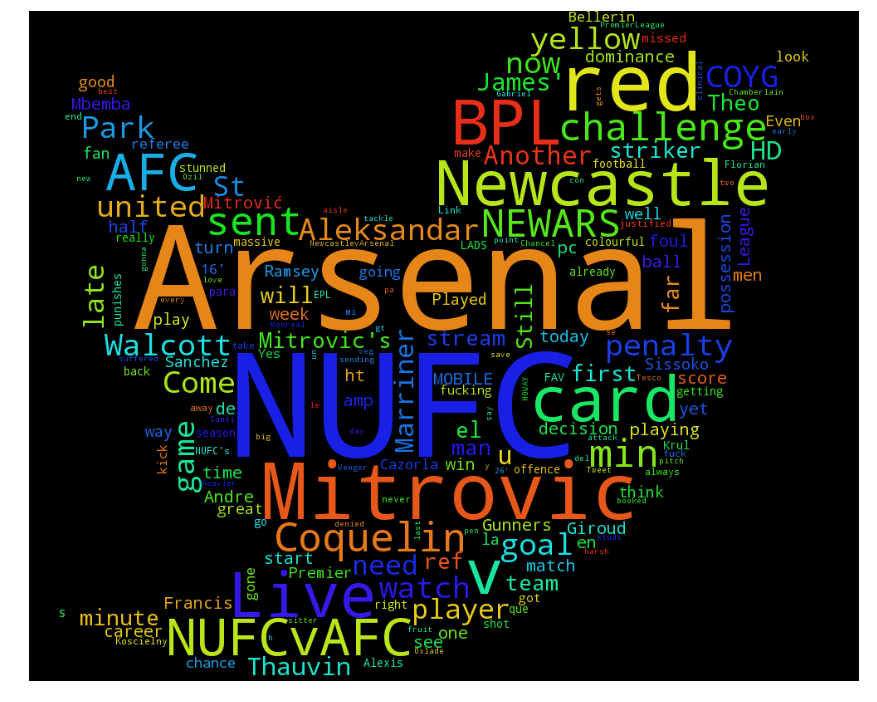

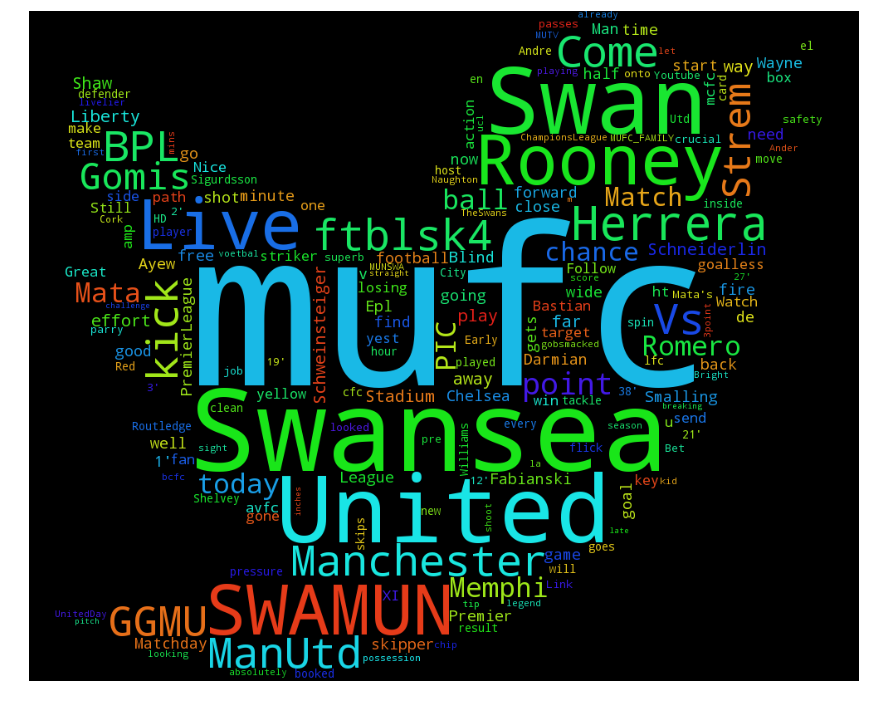

In [85]:
loadFileNameGW4 = ["/Users/Bya/Dropbox/Research/datas/GW4/1508292045_NUFCvsARSENAL_json.txt.csv",
                   
#                    "/Users/Bya/Dropbox/Research/datas/GW4/1508292300_6matches_json.txt.csv",
                   
#                    "/Users/Bya/Dropbox/Research/datas/GW4/1508302130_SAINTSvsNCFC_json.txt.csv",
                   "/Users/Bya/Dropbox/Research/datas/GW4/1508310000_SWANSvsMUFC_json.txt.csv",]

for i in range(len(loadFileNameGW4)):
    dfTweets = dataIO.CSVreturnDF(loadFileNameGW4[i], ['date', 'text', 'user', 'tags'])
    # join tweets to a single string
    words = ' '.join(dfTweets['text']).decode('utf-8')

    # remove URLs, RTs, and twitter handles
    no_urls_no_tags = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])

    Wordle(no_urls_no_tags)

In [54]:
import tweepy
import csv

import os
import sys

path = str(os.path.expanduser('~')) + '/git'
sys.path.append(path)
import twitter_api_tokens as tokens

#Twitter API credentials
consumer_key = tokens.consumer_key
consumer_secret = tokens.consumer_secret
access_key = tokens.access_token
access_secret = tokens.access_token_secret

In [55]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
	
	#authorize twitter, initialize tweepy
	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_key, access_secret)
	api = tweepy.API(auth)
	
	#initialize a list to hold all the tweepy Tweets
	alltweets = []	
	
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(screen_name = screen_name,count=200)
	
	#save most recent tweets
	alltweets.extend(new_tweets)
	
	#save the id of the oldest tweet less one
	oldest = alltweets[-1].id - 1
	
	#keep grabbing tweets until there are no tweets left to grab
	while len(new_tweets) > 0:
		print "getting tweets before %s" % (oldest)
		
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
		
		#save most recent tweets
		alltweets.extend(new_tweets)
		
		#update the id of the oldest tweet less one
		oldest = alltweets[-1].id - 1
		
		print "...%s tweets downloaded so far" % (len(alltweets))
	
	#transform the tweepy tweets into a 2D array that will populate the csv	
	outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
	
	#write the csv	
	with open('%s_tweets.csv' % screen_name, 'wb') as f:
		writer = csv.writer(f)
		writer.writerow(["id","created_at","text"])
		writer.writerows(outtweets)
	
	pass


if __name__ == '__main__':
	#pass in the username of the account you want to download
	get_all_tweets("byambaa_swiss")

getting tweets before 637965478497947647
...400 tweets downloaded so far
getting tweets before 513952371417047039
...597 tweets downloaded so far
getting tweets before 434250776727130111
...797 tweets downloaded so far
getting tweets before 401376475892305920
...995 tweets downloaded so far
getting tweets before 378863080991510527
...1194 tweets downloaded so far
getting tweets before 361812033777315839
...1394 tweets downloaded so far
getting tweets before 339579576902639615
...1594 tweets downloaded so far
getting tweets before 322016623340961792
...1794 tweets downloaded so far
getting tweets before 306454576045887487
...1993 tweets downloaded so far
getting tweets before 300243994355593215
...2192 tweets downloaded so far
getting tweets before 295221296957100031
...2392 tweets downloaded so far
getting tweets before 288830499814793216
...2592 tweets downloaded so far
getting tweets before 265097995958222847
...2792 tweets downloaded so far
getting tweets before 253850368281309183
.

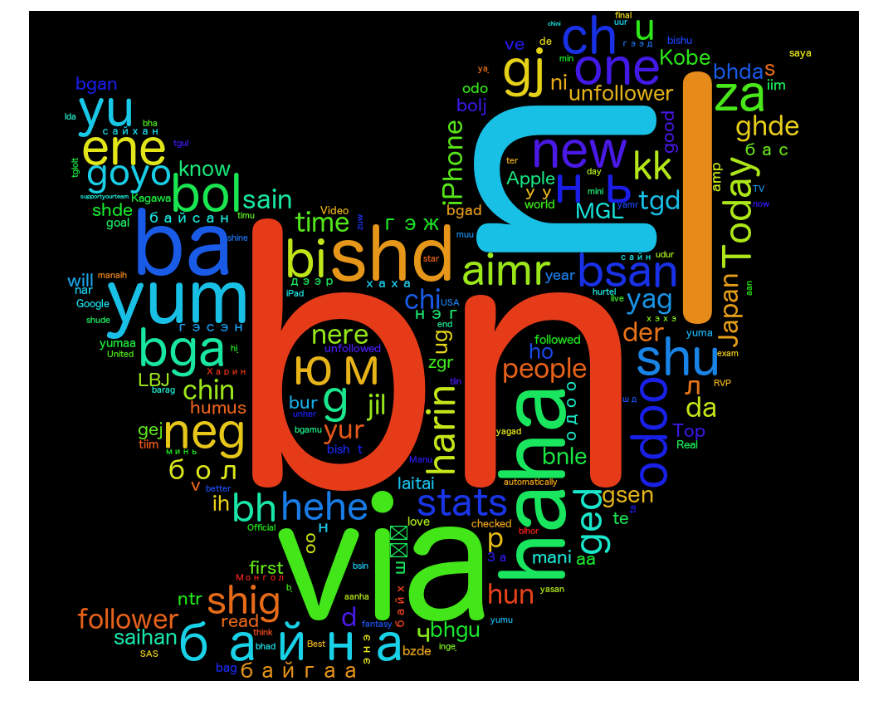

In [64]:
filepathName = "/Users/Bya/git/predictEPL/Wordle/byambaa_swiss_tweets.csv"
dfTweets = pd.read_csv(filepathName, header=None, names=['id', 'created_at','text'])
# join tweets to a single string
words = ' '.join(dfTweets['text']).decode('utf-8')

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

Wordle(no_urls_no_tags)